<a href="https://colab.research.google.com/github/vijaythapakdata/FacebookDataEda/blob/main/FaceBookDataEda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dependcies


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

Data Collection

In [2]:
facebook_data=pd.read_csv("/content/pseudo_facebook.csv")

In [3]:
#print first 5 rows
facebook_data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [4]:
#print the shape of data
facebook_data.shape

(99003, 15)

In [5]:
#print the columns
facebook_data.columns

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

In [6]:
#check any missing values
facebook_data.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [7]:
facebook_data.dropna(inplace=True)

In [8]:
facebook_data.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [11]:
facebook_data["age"].value_counts()

18     5196
23     4402
19     4390
20     3768
21     3670
       ... 
87       41
112      18
111      17
110      14
109       9
Name: age, Length: 101, dtype: int64

[]

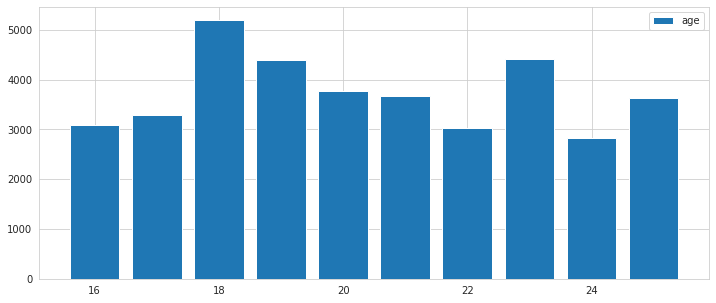

In [15]:
#plot a bargraph w.r.t age and top 10
plt.figure(figsize=(12,5))
sns.set_style("whitegrid")
plt.bar(list(facebook_data["age"].value_counts()[:10].keys()),list(facebook_data["age"].value_counts()[:10]),label="age")
plt.legend()
plt.plot()

In [19]:
#check data w.r.t likes
highest_likes=facebook_data[facebook_data["mobile_likes"]!=0]
highest_likes.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
1731,1711316,13,9,2000,5,male,40.0,0,0,1,0,1,0,0,0
1732,2154106,13,5,2000,6,male,11.0,0,0,1,0,1,0,0,0
1733,1443003,17,10,1996,5,male,20.0,0,0,1,0,1,0,0,0
1734,1218071,18,13,1995,5,male,529.0,0,0,1,0,1,0,0,0
1735,1711205,18,10,1995,6,male,29.0,0,0,1,0,1,0,0,0


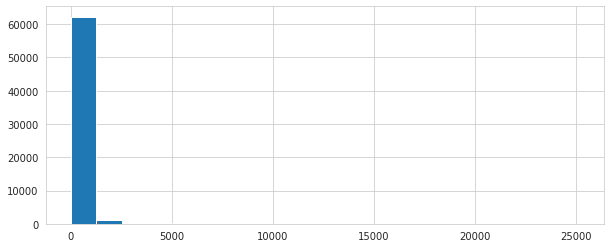

In [23]:
plt.figure(figsize=(10,4))
plt.hist(highest_likes["mobile_likes"],bins=20)
plt.show()

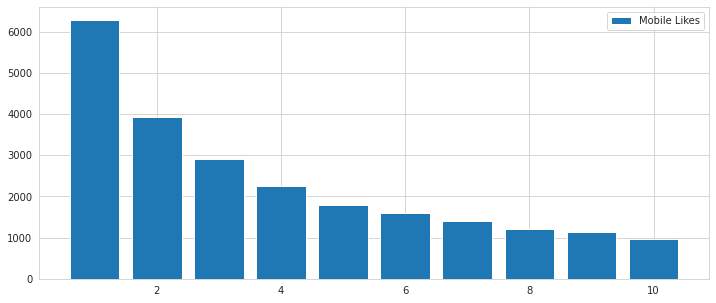

In [25]:
plt.figure(figsize=(12,5))
plt.bar(list(highest_likes["mobile_likes"].value_counts()[:10].keys()),list(highest_likes["mobile_likes"].value_counts()[:10]),label="Mobile Likes")
plt.legend()
plt.show()

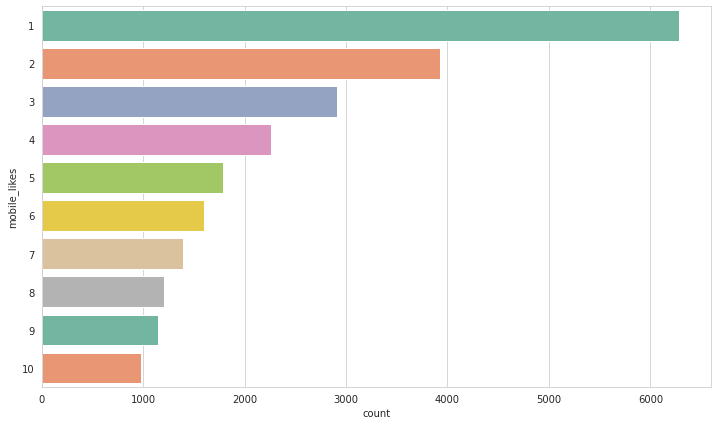

In [28]:
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")
sns.countplot(y="mobile_likes",data=facebook_data, palette="Set2",order=highest_likes["mobile_likes"].value_counts().index[:10])
plt.show()

In [31]:
friend_list=facebook_data[facebook_data["friend_count"]!=0]
friend_list.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
1962,1295206,14,15,1999,12,female,126.0,1,1,0,0,0,0,0,0
1963,1549189,14,20,1999,12,female,95.0,1,1,0,0,0,0,0,0
1964,1102182,14,10,1999,12,female,2.0,1,1,0,0,0,0,0,0
1965,1433884,13,15,2000,1,male,199.0,1,1,0,0,0,0,0,0
1966,1995935,13,1,2000,1,male,264.0,1,0,0,0,0,0,0,0


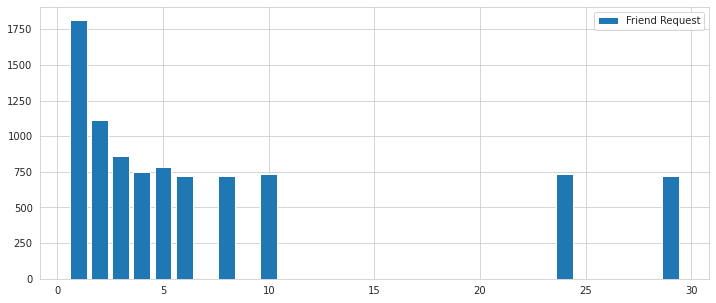

In [36]:
#draw bar graph w.r.t top friend count
plt.figure(figsize=(12,5))
plt.bar(list(friend_list["friend_count"].value_counts()[:10].keys()),list(friend_list["friend_count"].value_counts()[:10]),label="Friend Request")
plt.legend()
plt.show()

In [37]:
friend_accepted=facebook_data[facebook_data["friendships_initiated"]!=0]

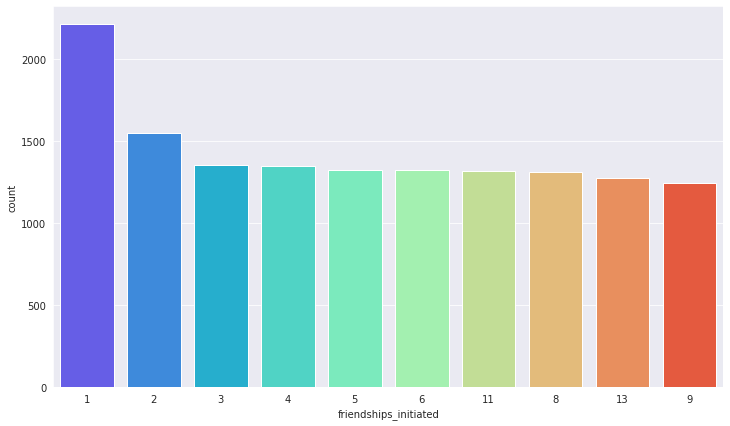

In [38]:
#check higest number of friend request initiated
plt.figure(figsize=(12,7))
sns.set_style(style="darkgrid")
sns.countplot(x="friendships_initiated",data=facebook_data,palette="rainbow",order=friend_accepted["friendships_initiated"].value_counts().index[:10])
plt.show()

In [39]:
#check mobile likes
mobile_likes_recived=facebook_data[facebook_data["mobile_likes_received"]!=0]

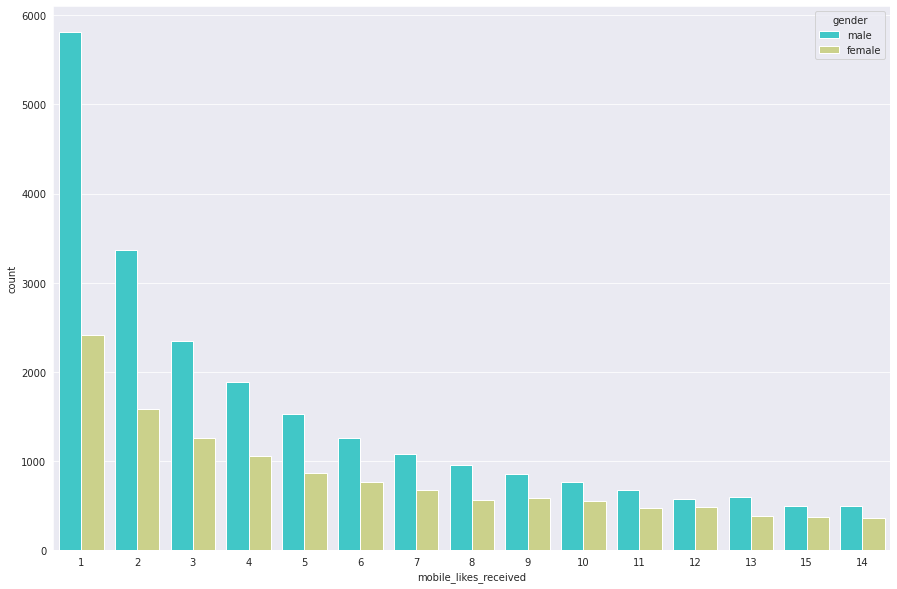

In [41]:
#check top 10 mobile like w.r.t gender
plt.figure(figsize=(15,10))
sns.set_style(style="darkgrid")
sns.countplot(x="mobile_likes_received",data=facebook_data,hue="gender",palette="rainbow",order=mobile_likes_recived["mobile_likes_received"].value_counts().index[:15])
plt.show()

In [42]:
#www like
www_likes=facebook_data[facebook_data["www_likes"]!=0]


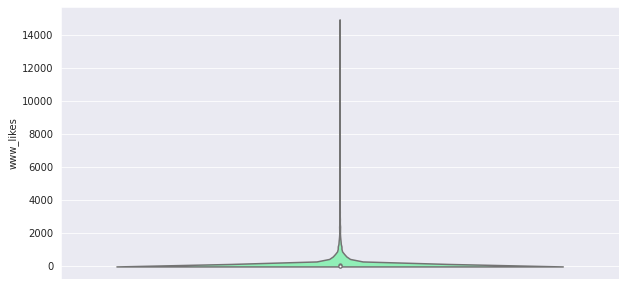

In [47]:
#draw violin plot of it
plt.figure(figsize=(10,5))
sns.violinplot(y="www_likes", data=facebook_data,order=www_likes["www_likes"].value_counts().index[:10],palette="rainbow")

In [48]:
#check www likes w.r.t gender
www_likes_received=facebook_data[facebook_data["www_likes_received"]!=0]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


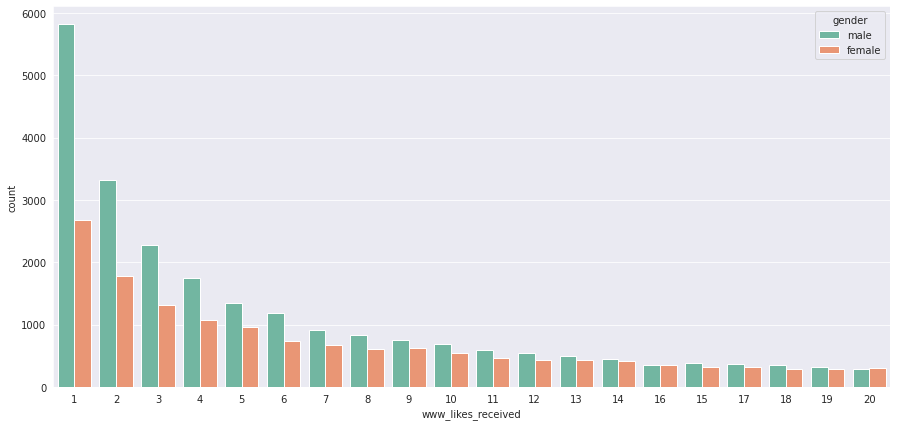

In [49]:
plt.figure(figsize=(15,7))
sns.set_style(style="darkgrid")
sns.countplot("www_likes_received", data=facebook_data,palette="Set2", hue="gender", order=www_likes_received["www_likes_received"].value_counts().index[:20])
plt.show()

In [50]:
#count males and females
facebook_data["gender"].value_counts()

male      58574
female    40252
Name: gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


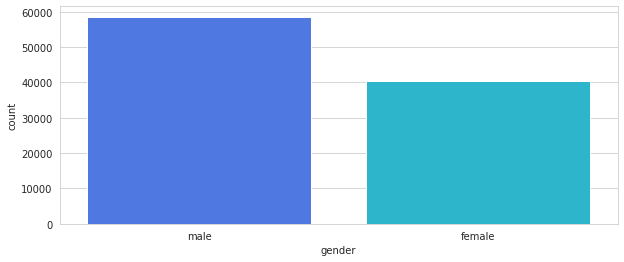

In [51]:
plt.figure(figsize=(10,4))
sns.set_palette("rainbow")
sns.set_style("whitegrid")
sns.countplot("gender",data=facebook_data)
plt.show()

No handles with labels found to put in legend.


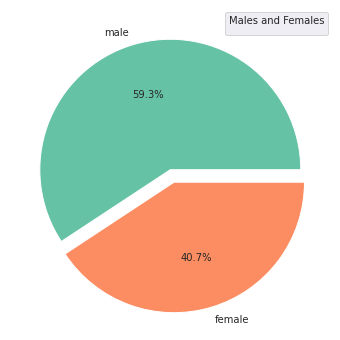

In [57]:
#draw piechart
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.set_palette("Set2")
explode=[0,0.1]
plt.legend(title="Males and Females")
plt.pie(list(facebook_data["gender"].value_counts()),labels=list(facebook_data["gender"].value_counts().keys()),autopct="%.1f%%",explode=explode)
plt.show()

In [58]:
#check count of b_day
facebook_data["dob_month"].value_counts()

1     11737
10     8466
5      8260
8      8255
3      8095
7      8006
9      7923
12     7883
4      7794
2      7617
6      7594
11     7196
Name: dob_month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


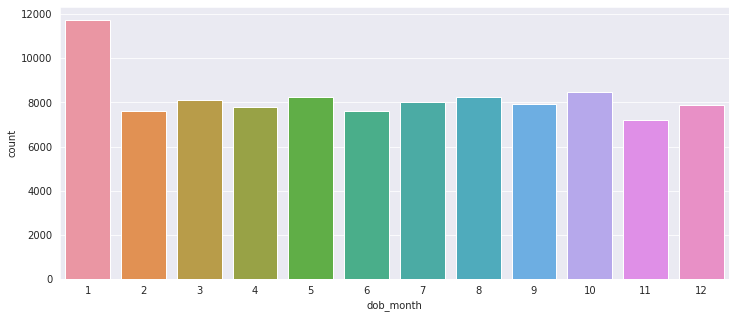

In [59]:
plt.figure(figsize=(12,5))
sns.set_style(style="darkgrid")
sns.set_palette("Set2")
sns.countplot("dob_month",data=facebook_data)
plt.show()

In [60]:
#check b_day count
facebook_data["dob_day"].value_counts()

1     7876
10    4027
15    3551
5     3539
12    3407
2     3391
3     3286
20    3262
17    3261
25    3213
14    3212
4     3212
8     3194
6     3103
11    3092
18    3076
7     3006
9     3001
16    2991
19    2963
28    2944
13    2876
23    2863
22    2834
21    2811
24    2802
27    2753
26    2746
30    2526
29    2502
31    1506
Name: dob_day, dtype: int64

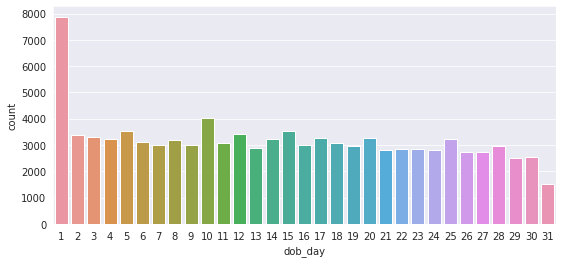

In [67]:
plt.figure(figsize=(9,4))
sns.set_palette("Set2")
sns.countplot(x="dob_day",data=facebook_data)
plt.show()

In [68]:
#count datw.r.t dateofbirth
facebook_data["dob_year"].value_counts()

1995    5196
1990    4402
1994    4390
1993    3768
1992    3670
        ... 
1926      41
1901      18
1902      17
1903      14
1904       9
Name: dob_year, Length: 101, dtype: int64

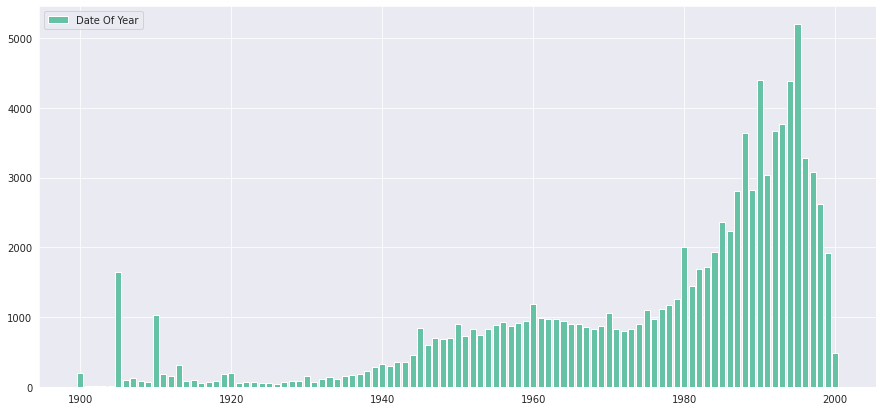

In [70]:
plt.figure(figsize=(15,7))
plt.bar(list(facebook_data["dob_year"].value_counts().keys()),list(facebook_data["dob_year"].value_counts()),label="Date Of Year")
plt.legend()
plt.show()